The source for this lecture is in *SageMath* kernel *Jupyter* notebook.
For more information, see [jupyter.org](http://jupyter.org/) and [sagemath.org](http://www.sagemath.org/).

See [ricopic.one/electronics/notebooks](http://ricopic.one/electronics/notebooks) for the source code notebook.
First, we import packages and all that.
We use `matplotlib` for plotting and `numpy` for numerics.

In [164]:
import sys
# append location of packages
sys.path.append('/usr/local/Cellar/python/2.7.13_1/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages')
sys.path.append('/usr/local/Cellar/python/2.7.13_1/Frameworks/Python.framework/Versions/2.7/lib/site-python')
# suppress subroutines from printing
save_stdout = sys.stdout
sys.stdout = open('trash', 'w')
sys.stdout = save_stdout
# load other packages
from matplotlib2tikz import save as tikz_save
import matplotlib.pyplot as plt
from matplotlib import rcParams
# rcParams['font.family'] = 'Helvetica Neue'
rcParams['font.size'] = '10'
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')

Let's consider them response of the circuit in \autoref{ex:rl_circuit_analysis_01}.
We found that the inductor had current and voltage responses
\begin{align}
    i_L(t) =
    &\left(
        i_0 +
        \frac{A \tau\omega}{(\tau\omega)^2+1}
    \right)
    e^{-t/\tau} + \nonumber \\
    &\frac{A}{\sqrt{(\tau\omega)^2+1}}  
        \sin(\omega t - \arctan \tau\omega)
\end{align}
and
\begin{align}
    v_L(t) =&
    -\frac{L}{\tau}
    \left(
        i_0 +
        \frac{A \tau\omega}{(\tau\omega)^2+1}
    \right)
    e^{-t/\tau} + \nonumber \\
    &\frac{AL\omega}{\sqrt{(\tau\omega)^2+1}}  
        \cos(\omega t - \arctan \tau\omega).
\end{align}

Note that the top line of each of these equations decays exponentially to zero.
The response while this term dominates is the *transient response* and the response thereafter is the *steady-state response*.

In $6 \tau$ (six time constants) the exponential term has decayed to less than $1\ \%$, so we often assume the other term will be dominating by that point.

We will plot $i_L(t)$ and $v_L(t)$ from above to illustrate transient and steady-state response.

First, a simple toggle control for saving figures.

In [202]:
save_figures = False # true to save LaTeX figures
fig_file_01 = 'transient_steady_responses'

Plots cannot be created without some definition of parameters. Let us define them as follows.

In [203]:
R = 1 # Ohms ... resistance
L = 1e-3 # H ... inductance
i_0 = 10 # A ... initial current in inductor
A = 10 # sinusoidal input amplitude
omega = 5e3 # sinusoidal input angular frequency
tau = L/R # s ... time constant

The current and voltage can be defined as follows.

In [233]:
i_L(t) = (i_0+A*tau*omega/((tau*omega)^2+1))*exp(-t/tau) + \
          (A/sqrt((tau*omega)^2+1)* \
           sin(omega*t - arctan2(tau*omega,1)))
v_L(t) = -L/tau*(i_0+A*tau*omega/ \
    ((tau*omega)^2+1))*exp(-t/tau) + \
    (A*L*omega/sqrt((tau*omega)^2+1)* \
     cos(omega*t - arctan2(tau*omega,1)))

What type of object are these? In *Python*, one can query an object with the function `type`, as follows.

In [235]:
type(i_L)

<type 'sage.symbolic.expression.Expression'>

So they are *SageMath* symbolic expressions.

Now we turn to defining simulation parameters.

In [236]:
N = 201 # number of points to plot
t_min = 0 # minimum time
t_max = 8*tau # maximum time
t_s = np.linspace(t_min,t_max,N) # array of time values

Now to create numerical arrays to plot.

In [ ]:
i_Ls = [] # initializing sampled array
v_Ls = [] # initializing sampled array
for i in range(0,N):
    i_Ls.append(i_L(t_s[i])) # build array of values
    v_Ls.append(v_L(t_s[i])) # build array of values

We use the package `matplotlib` to plot it.

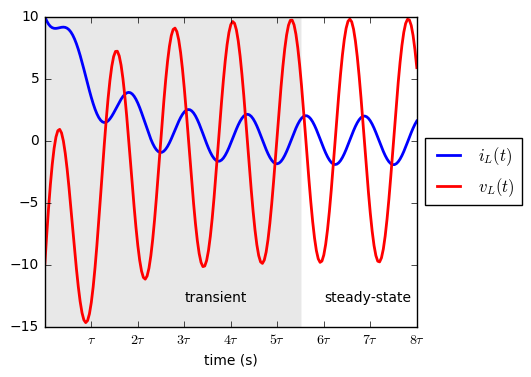

In [237]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(t_s,i_Ls,'b-',linewidth=2,label='$i_L(t)$') # plot
ax.plot(t_s,v_Ls,'r-',linewidth=2,label='$v_L(t)$') # plot
# shrink current axis by 20%
box = ax.get_position()
ax.set_position(
    [box.x0, box.y0, box.width * 0.8, box.height]
)
# put legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# annotate
ax.set_xlabel('time (s)')
ax.set_xlim([t_s[0],t_s[-1]])
ax.set_xticks(
    tau*np.linspace(1,int(t_max/tau),int(t_max/tau))
)
ax.set_xticklabels(
    ["$\\tau$","$2\\tau$","$3\\tau$","$4\\tau$",
     "$5\\tau$","$6\\tau$","$7\\tau$","$8\\tau$"]
)
# save for LaTeX's pgfplots
if save_figures:
    tikz_save(
        'figures/'+fig_file_01+'.tex', 
        figureheight='.5\linewidth', 
        figurewidth='1\linewidth'
    )
# shade and annotate transient and steady-state regions
ax.axvspan(0, 5.5*tau,
    edgecolor='#FFFFFF',facecolor='#222222',alpha=float(0.1)
)
ax.annotate(
    'transient', xy=(0.003, -14), xytext=(.003, -13)
)
ax.annotate(
    'steady-state', xy=(0.006, -14), xytext=(.006, -13)
)
plt.show() # display here

The figure (\autoref{fig:transient_steady_responses}) shows that in around six time constants, as is typical, the responses settle in to steady oscillations.
Note that the steady-state is not necessarily *static*, but can also be oscillatory, as in this case.
In fact, every linear dynamic system driven by a sinusoid will have a sinusoidal steady-state response, as we will explore further in the coming lectures.

Often the term *ac circuit analysis* is used refer to circuits with sinusoidal sources *in steady-state*.
In many circuits, steady-state is acheived relatively quickly, which is why this is the most popular type of analysis.
Our approach has yielded *both* responses, together.
In order to consider the steady-state only, all we must do is ignore the exponentially decaying terms, which are the initial conditions' contributions to the transient response.

However, there are easier methods of obtaining the steady-state response if the transient response isn't of interest.
The next chapter (\autoref{ch:steady_state}) considers these.